<img src="python-logo-generic.svg" alt="Python Logo">

# Introduction to Python: The language, ecosystem and community

**Austin Godber**  
**@godber**  
DesertPy Co-Organizer  
Meetup, Github and http://desertpy.com

DesertPy - 10/26/2016

# Getting Python

* Windows - Anaconda/miniconda, Enthought Canopy
* OS X - Default install, Homebrew, Anaconda
* Linux - Default install, Anaconda

# Follow Along

If you have IPython/Jupyter Notebook installed, you can grab the notebook (`Intro_To_Python.ipynb`) here:

https://goo.gl/W7bwyk

These examples should work in a relatively recent Anaconda installation.

<img src="python-stack.png" width=350px style="float:right;">


# Python Language

* Python
  * https://goo.gl/jQf5BZ
* Python Standard Library
  * https://goo.gl/raCczu
* 3rd Party Modules at PyPI
  * https://pypi.python.org/pypi

Technically, libraries are **modules**, a **package** contains submodules and has a `__path__` attribute.

# Python

* Python - https://docs.python.org/3/reference/index.html
  * Python Interpreter: CPython, Pypy, IronPython(2.7), Jython(2.7)
  * Core Language Syntax, built-ins
* Python Standard Library - https://docs.python.org/3/library/index.html
  * C or Python modules included with Python
  * These modules need to be imported, e.g.: `import math`

# 3rd Party Libs
* 3rd Party Modules - https://pypi.python.org/pypi
  * Install them with `pip`
  * These modules need to be imported
    * e.g.: `import requests`

# Python 2 vs Python 3

### Simple - Use Python 3 unless you have a convincing reason not to.

* https://docs.python.org/3/
* https://docs.python.org/2.7/

I'll be talking about Python 3.5 today.

# Python Language Syntax

# Built-in Functions

<img src="python-builtin-functions.png" style="float:center;">

# Built-in Constants

* `False`, `True`
* `None`
* `NotImplemented`
* `Elipsis` (same as `...`)
* `__debug__`
* `quit()`, `exit()`, `copyright`, `license`, `credits`

# Built-in Types

* numerics - `int`, `float`, `complex`
* sequences - `list`: `[]`, `tuple`: `()`, `range`, `str`: `''`, etc.
* mappings - `dict`: `{}`, `set`, `frozenset`
* Others - iterators, generators, binary sequences, memoryviews, classes, instances, exceptions, modules

I should really include some usage examples here.  Really, I should.

We'll have to make do with the upcoming examples.

# Boolean Operations

* `False` things: `False`, `None`, `0`, `0.0`, `''`, `()`, `[]`, `{}`, any object whose `__bool__` or `__len__` method returns a `False` value.
* Everything else is true.

<img src="boolean.png" style="float:center;">

# Comparisons

<img src="comparisons.png" style="float:center;">

# Control Structures

if, else, elif, for, while, break, continue

In [34]:
x = [1, 2, 3]
for i in x:
    print(i)

1
2
3


# Data and Execution Model

To really understand the guts of Python, after you get the general syntax understood, read the Data Model and Execution Model docs:

* https://docs.python.org/3/reference/datamodel.html
* https://docs.python.org/3/reference/executionmodel.html

# Examples

Let's look at some examples:

In [1]:
print("Hello, World!")

Hello, World!


## A function

In [2]:
def hello1():
    print("Hello, World!")
    
hello1()

Hello, World!


## A function with a keyword argument

In [36]:
def hello2(name=None):
    if not name:
        name = "World"
    print("Hello, %s!" % name)
    print("Hello, " + name + "!")
    
hello2()
hello2("Skippy")

Hello, World!
Hello, World!
Hello, Skippy!
Hello, Skippy!


Sure, we could have set `name="World"`, but then I wouldn't have a good example of `if not name:` and I might not remember to talk about empty sequences.

# Classes

Python's simplest class as an example of the dynamic nature of Python.

In [4]:
class Classy:
    pass

c = Classy()
c.foo = 'Lobsters!'
c.bar = lambda x: x**2

print(c.foo, c.bar(3))

Lobsters! 9


You don't have to do it the way shown above, typically, concrete class definitions are used.

In [38]:
class Person1:
    """Class representing a person, for providing Greetings."""
    
    def __init__(self, name):
        self.name = name
        
    def greet(self):
        print("Hello, %s!" % self.name)

skippy = Person1("Skippy")
skippy.greet()
print(skippy.name)
print(skippy)

Hello, Skippy!
Skippy


In [46]:
class Person2:
    """Class representing a person, with greetings and height."""
    
    def __init__(self, name, height):
        self.name = name
        self.height = height  # Height of person in inches

    def greet(self):
        print("Hello, %s!" % self.name)
    
    @property
    def height_ft(self):
        return self.height / 12.0

chip = Person2('Chip', 70)
print(chip.height)
print(chip.height_ft)
print("Chip is %.2f tall" % chip.height_ft)

70
5.833333333333333
Chip is 5.83 tall


# Inheritance

In [7]:
class Ninja(Person2):
    """A stealthy person or 1337 hacker."""
    ninja_types = ["stealth", "hacker"]
    
    def __init__(self, name, height, ninja_type):
        super().__init__(name, height)
        if ninja_type in self.ninja_types:
            self.ninja_type = ninja_type
        else:
            raise RuntimeError('Invalid ninja_type: %s' % ninja_type)
    
    def work(self):
        if self.ninja_type == 'stealth':
            print("Karate Chop!")
        elif self.ninja_type == 'hacker':
            print("Hack hack hack.")

In [8]:
wally = Ninja('Wally', 62, 'hacker')
print("{name} is {height:.2f} tall.".format(name=wally.name, height=wally.height_ft))
wally.work()

Wally is 5.17 tall.
Hack hack hack.


# Exceptions

You see that `raise` in the class definition for `Ninja`?

In [9]:
try:
    webster = Ninja('Webster', 71, 'quilting')
except RuntimeError as e:
    print('No such thing as a Quilting ninja! \nError: %s' % e)
finally:
    print('Nice work!')

No such thing as a Quilting ninja! 
Error: Invalid ninja_type: quilting
Nice work!


Obviously this is an example of exception handling done poorly.  There's a lot more too it, custom exception classes, handling multiple exceptions, re-raising errors.  Doing something useful in except blocks...

## What's up with the """?

It's called a `docstring`, you can use them on modules, functions and classes.  There's a whole ecosystem of tools designed to use them for documentation and testing.  Use 'em!

In [10]:
Ninja.__doc__

'A stealthy person or 1337 hacker.'

## More OOP?

If OOP is a good fit for your problem, I've found this to be a great post on OOP in Python:

https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/

# Context Managers

"A context manager is an object that defines the runtime context to be established when executing a with statement."

Turns this ... 

In [11]:
f = open('file.txt', 'r')
print(f.read())
f.close()

I'm a text file!



into this ...

In [12]:
with open('file.txt', 'r') as f:
    print(f.read())

I'm a text file!



# The Standard Libraries

Lots of fabulous tools we don't have time for, things like:

* fancy data types like datetimes and calendars
* path and file manipulation
* basic math
* Logging, curses, network protocols ... on and on

Dive in! https://docs.python.org/3/library/index.html

# Functional Programming

A bit, but we don't have time for it, check out `itertools` and `functools` and the concepts of iterators ang generators.  There are mechanisms to enable FP, check this:

https://docs.python.org/3.5/howto/functional.html

# Last warning on Python 3 vs 2.

If you have to write portable code, read up on it, it's messy but not too bad.  Lots of people have managed it, you can too!  Look for the package `six`.

# Python Ecosystem

# Python Tools

* REPL - python, IPython
* Docstrings -> Sphinx -> Read The Docs
* Packages - pip (wheel), cookiecutter, on `pypi`
* Interactive Environments - Spyder, Jupyter (IPython) Notebook
* Editors - sublimetext, atom, spyder, PyCharm, vim
* Syntax/Code Checkers - pylint, pep8, autopep8
* Testing - doctests and unittest built in, `py.test` and `nose` in pypi

Oh, geez, too much stuff!

# Python Virtual Environments

* Identify and isolate the python and 3rd party packages your code depends on.
* Use `conda` environments or `virtualenv` and `virtualenv-wrapper` or `venv` in Python 3.
* Analysis/Algorithm development and software development might be different.
* Eitherway, you'll pay the price for not tracking dependency versions over the long run.

# Python Style and Idiomatic Python

* PEP 8
  * https://www.python.org/dev/peps/pep-0008/
  * spaces, not tabs, 4 or 2, whatever you do, be consistent!
* The Python Way
  * `import this`
* Idiomatic examples
  * http://python.net/~goodger/projects/pycon/2007/idiomatic/handout.html

# Use Cases

So many!

# Interactive Analysis, Presentation and Document Creation

Use the IPython Notebook, now known as the Jupyter Notebook.  Supports many languages and many uses.

This presentation was created and is running, interactively in the Jupyter Notebook.

In [13]:
print("Foo Bar!")

Foo Bar!


# Database Access

* Standard Database Drivers
  * All of them, mostly.
* ORMs
    * **SQLAlchemy**
    * Django
    * Pewee
    * etc.
* Various db migration tools associated with above.

In [14]:
! rm sqlalchemy_example.db

## Do imports and setup base

In [15]:
from sqlalchemy import (
    Column,
    ForeignKey,
    Integer,
    String,
    create_engine)
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship

Base = declarative_base()

## Declare your Model

In [16]:
class Person(Base):
    __tablename__ = 'person'
    id = Column(Integer, primary_key=True)
    name = Column(String(250), nullable=False)
    height = Column(Integer)
    addresses = relationship("Address", back_populates="person")
    
class Address(Base):
    __tablename__ = 'address'
    id = Column(Integer, primary_key=True)
    post_code = Column(String(250), nullable=False)
    person_id = Column(Integer, ForeignKey('person.id'))
    person = relationship("Person", back_populates="addresses")
    
    def __repr__(self):
        return "Address: Postal Code %s" % self.post_code
    
engine = create_engine('sqlite:///sqlalchemy_example.db')
Base.metadata.create_all(engine)

You don't really want to call `create_all` all the time ...

Modified version of:
http://pythoncentral.io/introductory-tutorial-python-sqlalchemy/

though this is the real authority:

http://docs.sqlalchemy.org/en/latest/orm/tutorial.html

Now's a good time to learn about `__repr__()` and relationships.

## Look at the resultant SQLite database

In [17]:
! sqlite3 sqlalchemy_example.db ".schema"

CREATE TABLE person (
	id INTEGER NOT NULL, 
	name VARCHAR(250) NOT NULL, 
	height INTEGER, 
	PRIMARY KEY (id)
);
CREATE TABLE address (
	id INTEGER NOT NULL, 
	post_code VARCHAR(250) NOT NULL, 
	person_id INTEGER, 
	PRIMARY KEY (id), 
	FOREIGN KEY(person_id) REFERENCES person (id)
);


## Add a Person and Address to the DB

In [18]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

DBSession = sessionmaker(bind=engine)
session = DBSession()

new_person = Person(name='Austin Godber')
session.add(new_person)
session.commit()

new_address = Address(post_code='85280', person=new_person)
session.add(new_address)
session.commit()

## Check out the DB contents

In [19]:
! sqlite3 sqlalchemy_example.db \
  "SELECT * FROM person; SELECT * FROM address;"

1|Austin Godber|
1|85280|1


## Work with the Objects in the ORM

In [20]:
# keep in mind, we're using the session and engine create above
person = session.query(Person).first()
print(person)
print(person.name)
print(person.addresses[0])   # address implements __repr__()
print(person.addresses[0].post_code)

Austin Godber
Address: Postal Code 85280
85280


Lots more functionality ... queries, filters, many-to-many relationships, etc.

## Web Applications
  * **Flask**
  * Django
  * CherryPy, Pyramid, Web2py, etc
  * Lots more no doubt!

```python
from flask import Flask
app = Flask(__name__)

@app.route("/")
def hello():
    return "Hello World!"

if __name__ == "__main__":
    app.run()
```

## Onward!

This is a rabbit hole you could spend a decade on ... onward!

<img src="onward.jpg" width=600px alt="Onward!">


Image Credit: https://svpow.com/2011/02/22/onward/

# Numerical, Scientific and Visualization Applications
  * Pandas, **Numpy**, Scipy
  * Scikit-learn
  * Many, many domain specific tools like: AstroPy, Biopython, etc
  * Plotting - **Matplotlib**, Bokeh (dynamic/d3), seaborn, Altair
    * [Fun Comparison Post](https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)

## Handle the Imports

In [21]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pylab as plt

## Generating and displaying a series

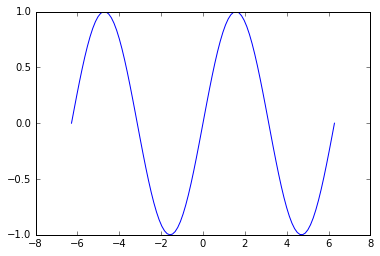

In [22]:
# Create X values from -Pi t- Pi, 2001 steps
x = np.linspace(2 * -np.pi, 2 * np.pi, 100)
plt.plot(x, np.sin(x));  # why the ;?

## How about something fancier?

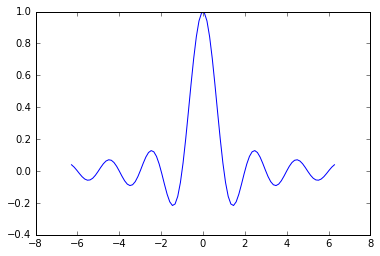

In [23]:
plt.plot(x, np.sinc(x));

# Image manipulation and Image Processing

* PIL/Pillow, Imageio, scipy
* scikit-image

## Reading in an image, inspecting it

In [24]:
from scipy import misc
wallaby = misc.imread('wallaby_746_600x450.jpg')
print(type(wallaby), wallaby.size, wallaby.shape, wallaby.dtype)

<class 'numpy.ndarray'> 810000 (600, 450, 3) uint8


## Displaying and Image

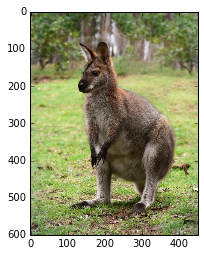

In [25]:
plt.imshow(wallaby)

## Split the image into its RGB components

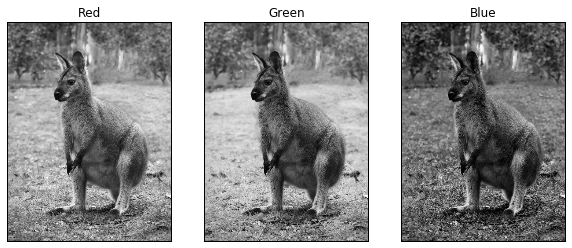

In [26]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3)
fig.set_size_inches(10, 4)
ax0.imshow(wallaby[:, :, 0], cmap='gray')
ax0.get_yaxis().set_ticks([]); ax0.get_xaxis().set_ticks([]); ax0.set_title('Red')
ax1.imshow(wallaby[:, :, 1], cmap='gray')
ax1.get_yaxis().set_ticks([]); ax1.get_xaxis().set_ticks([]); ax1.set_title('Green')
ax2.imshow(wallaby[:, :, 2], cmap='gray')
ax2.get_yaxis().set_ticks([]); ax2.get_xaxis().set_ticks([]); ax2.set_title('Blue')

## Looking at a histogram of the pixels in one band

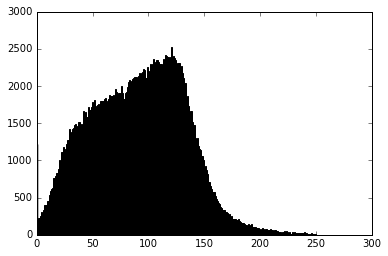

In [27]:
h = plt.hist(wallaby[:, :, 2].flatten(), 256,  fc='k', ec='k')

## Running a Sobel Filter on the Image

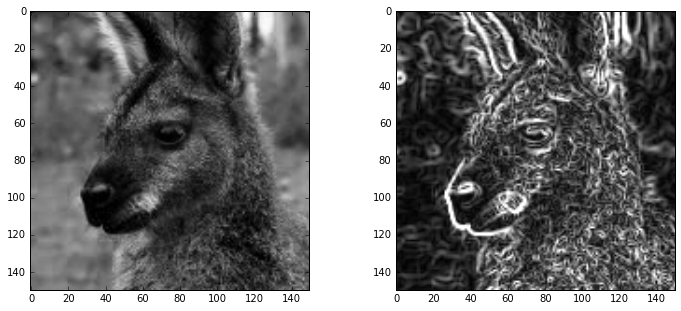

In [28]:
from skimage import filters, exposure

fig, (ax0, ax1) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

edges = filters.sobel(wallaby[:, :, 2])
ax0.imshow(wallaby[100:250, 100:250, 2], cmap='gray');
ax1.imshow(edges[100:250, 100:250], cmap='gray', clim=(0.0,0.2));

# Python as an embedded scripting platform

* Blender
* ArcGIS
* QGIS
* Others likely

# Thank You!

**Austin Godber**  
**@godber**  
DesertPy Co-Organizer  
Meetup, Github and http://desertpy.com

https://goo.gl/W7bwyk

Desert Code Camp 2016.1 - 10/08/2016